In [ ]:
%%html
<marquee style='width: 100%; color: blue;'><b>Project 2 : Music Genre Identification</b></marquee>
<marquee style='width: 100%; color: red;'><b>By: Sachin Gaydhani on February 13, 2023</b></marquee>

## Shortcuts
Below is a **code cell**. Once the toolbar button indicates CONNECTED, click in the cell to select it and execute the contents in the following ways:

* Click the **Play icon** in the left gutter of the cell;
* Type **Cmd/Ctrl+Enter** to run the cell in place;
* Type **Shift+Enter** to run the cell and move focus to the next cell (adding one if none exists); or
* Type **Alt+Enter** to run the cell and insert a new code cell immediately below it.

There are additional options for running some or all cells in the **Runtime** menu.

* Esc + A : Insert a cell above the current cell
* Esc + B : Insert a cell below the current cell
* Ctrl + / : Comment the selected code

## Formal Problem Statement
#Project 2 : Music Genre Identification
Download data from here :  https://www.dropbox.com/s/4jw31k5mlzcmgis/genres.tar.gz?dl=0
Goal : Given audio files for songs , identify which genre they fall in 
Suggested Guidelines : 
1. You'll have to prepare and maintain your own version of train and validation from the full data given 
2. Major challenge here is to create features from audio files which can then be passed to your choice of deep learning algorithm 
3. Your solution needs to be uploaded on GitHub repo of your team



## Data Files
* genres.tar.gz
* https://www.dropbox.com/s/4jw31k5mlzcmgis/genres.tar.gz?dl=0

##NumPy
* It is a *third-party library* (i.e. it is not part of Python's standard library) that facilitates numerical computing in Python by providing users with a **versatile N-dimensional array** object for storing data, and powerful mathematical functions for operating on those arrays of numbers.

* NumPy is the reason why Python stands among the ranks of R, Matlab, and Julia, as one of the most popular languages for doing STEM-related computing.

* # ndarray 
https://numpy.org/doc/stable/reference/arrays.ndarray.html

* # NumPy Fundamentals 
https://numpy.org/doc/stable/user/basics.html#numpy-basics

* # NumPy Reference 
https://numpy.org/doc/stable/reference/index.html

In [ ]:
import numpy as np

## Pandas
* Pandas is a Python library used for working with data sets.

* It has functions for analyzing, cleaning, exploring, and manipulating data.

* The name "Pandas" has a reference to both "Panel Data", and "Python Data Analysis" and was created by Wes McKinney in 2008

## Difference between NumPy & Pandas

* What is difference between pandas and NumPy?
The Pandas module mainly works with the tabular data, whereas the NumPy module works with the numerical data. The Pandas provides some sets of powerful tools like DataFrame and Series that mainly used for analyzing the data, whereas in NumPy module offers a powerful object called Array.

In [ ]:
import pandas as pd

## Matplotlib
* Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible. Create publication quality plots. Make interactive figures that can zoom, pan, update.

https://matplotlib.org/stable/users/index

## matplotlib.pyplot
* matplotlib.pyplot is a collection of functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

## matplotlib.style
* With matplotlib, we can style the plots like, an HTML webpage is styled by using CSS styles. We just need to import style package of matplotlib library.
* There are various built-in styles in style package, and we can also write customized style files and, then, to use those styles all you need to import them and apply on the graphs and plots. In this way, we need not write various lines of code for each plot individually again and again i.e. the code is reusable whenever required. 



## seaborn
* Seaborn is a library that uses Matplotlib underneath to plot graphs. It will be used to visualize random distributions.

## seaborn Vs Matplotlib
* The difference between seaborn vs matplotlib is that seaborn utilize a similarly basic syntax that is simpler to understand and learn, while matplotlib utilizes relatively lengthy and complex syntax

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
from glob import glob

In [ ]:
import os
os.mkdir('train')
os.mkdir('test')
import json
import math
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
from wordcloud import WordCloud, STOPWORDS

In [ ]:
import librosa, librosa.display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras as keras

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
import pylab
from matplotlib import figure
import gc


In [ ]:
!wget https://www.dropbox.com/s/4jw31k5mlzcmgis/genres.tar.gz?dl=0

--2023-02-14 09:36:33--  https://www.dropbox.com/s/4jw31k5mlzcmgis/genres.tar.gz?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/4jw31k5mlzcmgis/genres.tar.gz [following]
--2023-02-14 09:36:33--  https://www.dropbox.com/s/raw/4jw31k5mlzcmgis/genres.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc232498bac4b1f6f4905b0b3e37.dl.dropboxusercontent.com/cd/0/inline/B2fPSm-9f7L3-cwv2p7rg7ujo1qQxBotQiqUt7Fcp1qZDYiRP1wc3eeKSAPWa3udbLOrpragSOHm174Ac9x6_rmDoq0hQkvzxSBRvUpVOW6ItwzhphBLnX4QjdkMoOfC0zDdJ9WM1s79qifRrgbXFCf9vxwS9yf5W4z4eTH2Tm3L2A/file# [following]
--2023-02-14 09:36:34--  https://uc232498bac4b1f6f4905b0b3e37.dl.dropboxusercontent.com/cd/0/inline/B2fPSm-9f7L3-cwv2p7rg7ujo1qQxBotQiqUt7Fcp1qZDYiRP1wc3eeKSAPWa3udbLOrp

In [ ]:
os.getcwd()

'/content'

In [ ]:
!tar -xvf './genres.tar.gz?dl=0'

genres/
genres/blues/
genres/blues/blues.00000.au
genres/blues/blues.00001.au
genres/blues/blues.00002.au
genres/blues/blues.00003.au
genres/blues/blues.00004.au
genres/blues/blues.00005.au
genres/blues/blues.00006.au
genres/blues/blues.00007.au
genres/blues/blues.00008.au
genres/blues/blues.00009.au
genres/blues/blues.00010.au
genres/blues/blues.00011.au
genres/blues/blues.00012.au
genres/blues/blues.00013.au
genres/blues/blues.00014.au
genres/blues/blues.00015.au
genres/blues/blues.00016.au
genres/blues/blues.00017.au
genres/blues/blues.00018.au
genres/blues/blues.00019.au
genres/blues/blues.00020.au
genres/blues/blues.00021.au
genres/blues/blues.00022.au
genres/blues/blues.00023.au
genres/blues/blues.00024.au
genres/blues/blues.00025.au
genres/blues/blues.00026.au
genres/blues/blues.00027.au
genres/blues/blues.00028.au
genres/blues/blues.00029.au
genres/blues/blues.00030.au
genres/blues/blues.00031.au
genres/blues/blues.00032.au
genres/blues/blues.00033.au
genres/blues/blues.00034.a

In [ ]:
#import tarfile
#data = tarfile.open("genres.tar.gz?dl=0")
#data.extractall('./')
#data.close()

In [ ]:
!pip install path

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from path import Path

In [ ]:
def create_spectrogram(filename,name):
    plt.interactive(False)
    clip, sample_rate = librosa.load(filename, sr=None) #None uses Native sample rate of the file
    fig = plt.figure(figsize=[0.72,0.72])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    #Compute a mel-scaled spectrogram.
    S = librosa.feature.melspectrogram(y=clip, sr=sample_rate)
    #Display a spectrogram/chromagram/cqt/etc.
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    filename  = '/content/train/' + name + '.jpg'
    plt.savefig(filename, dpi=400, bbox_inches='tight',pad_inches=0)
    plt.close()    
    fig.clf()
    plt.close(fig)
    plt.close('all')
    del filename,name,clip,sample_rate,fig,ax,S

In [ ]:
from glob import glob
glob('./genres/*')

['./genres/blues',
 './genres/reggae',
 './genres/jazz',
 './genres/hiphop',
 './genres/rock',
 './genres/disco',
 './genres/classical',
 './genres/pop',
 './genres/country',
 './genres/metal']

In [ ]:
file_list=sorted(list(glob("./genres/*/*")))
file_list[999]

'./genres/rock/rock.00099.au'

In [ ]:
#/content/genres/blues/blues.00000.au
file_list[1].split('/')[-1]

'blues.00001.au'

In [ ]:
for i,file in enumerate(file_list):
    print(i,end=' ')
    filename,name = file,file.split('/')[-1]
    create_spectrogram(filename,name)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

In [ ]:
file_list

['./genres/blues/blues.00000.au',
 './genres/blues/blues.00001.au',
 './genres/blues/blues.00002.au',
 './genres/blues/blues.00003.au',
 './genres/blues/blues.00004.au',
 './genres/blues/blues.00005.au',
 './genres/blues/blues.00006.au',
 './genres/blues/blues.00007.au',
 './genres/blues/blues.00008.au',
 './genres/blues/blues.00009.au',
 './genres/blues/blues.00010.au',
 './genres/blues/blues.00011.au',
 './genres/blues/blues.00012.au',
 './genres/blues/blues.00013.au',
 './genres/blues/blues.00014.au',
 './genres/blues/blues.00015.au',
 './genres/blues/blues.00016.au',
 './genres/blues/blues.00017.au',
 './genres/blues/blues.00018.au',
 './genres/blues/blues.00019.au',
 './genres/blues/blues.00020.au',
 './genres/blues/blues.00021.au',
 './genres/blues/blues.00022.au',
 './genres/blues/blues.00023.au',
 './genres/blues/blues.00024.au',
 './genres/blues/blues.00025.au',
 './genres/blues/blues.00026.au',
 './genres/blues/blues.00027.au',
 './genres/blues/blues.00028.au',
 './genres/blu

In [ ]:
file_names=[x.split('/')[-1] for x in file_list]
file_names

['blues.00000.au',
 'blues.00001.au',
 'blues.00002.au',
 'blues.00003.au',
 'blues.00004.au',
 'blues.00005.au',
 'blues.00006.au',
 'blues.00007.au',
 'blues.00008.au',
 'blues.00009.au',
 'blues.00010.au',
 'blues.00011.au',
 'blues.00012.au',
 'blues.00013.au',
 'blues.00014.au',
 'blues.00015.au',
 'blues.00016.au',
 'blues.00017.au',
 'blues.00018.au',
 'blues.00019.au',
 'blues.00020.au',
 'blues.00021.au',
 'blues.00022.au',
 'blues.00023.au',
 'blues.00024.au',
 'blues.00025.au',
 'blues.00026.au',
 'blues.00027.au',
 'blues.00028.au',
 'blues.00029.au',
 'blues.00030.au',
 'blues.00031.au',
 'blues.00032.au',
 'blues.00033.au',
 'blues.00034.au',
 'blues.00035.au',
 'blues.00036.au',
 'blues.00037.au',
 'blues.00038.au',
 'blues.00039.au',
 'blues.00040.au',
 'blues.00041.au',
 'blues.00042.au',
 'blues.00043.au',
 'blues.00044.au',
 'blues.00045.au',
 'blues.00046.au',
 'blues.00047.au',
 'blues.00048.au',
 'blues.00049.au',
 'blues.00050.au',
 'blues.00051.au',
 'blues.0005

In [ ]:
df = pd.DataFrame({'Filename': file_names})

In [ ]:
df.head()

,Filename
0,blues.00000.au
1,blues.00001.au
2,blues.00002.au
3,blues.00003.au
4,blues.00004.au


In [ ]:
df['Labels'] = [x.split('.')[0] for x in df.Filename]

In [ ]:
df.head()

,Filename,Labels
0,blues.00000.au,blues
1,blues.00001.au,blues
2,blues.00002.au,blues
3,blues.00003.au,blues
4,blues.00004.au,blues


In [ ]:
df.Labels.value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: Labels, dtype: int64

In [ ]:
classes=list(df['Labels'].value_counts().index)
print(len(classes))
classes

10


['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [ ]:
for cl in classes:
  os.mkdir('/content/train/'+cl)

In [ ]:
for cl in classes:
  os.mkdir('/content/test/'+cl)

In [ ]:
class_dict_map={x:'/content/train/'+x+'/' for x in classes}
class_dict_map

{'blues': '/content/train/blues/',
 'classical': '/content/train/classical/',
 'country': '/content/train/country/',
 'disco': '/content/train/disco/',
 'hiphop': '/content/train/hiphop/',
 'jazz': '/content/train/jazz/',
 'metal': '/content/train/metal/',
 'pop': '/content/train/pop/',
 'reggae': '/content/train/reggae/',
 'rock': '/content/train/rock/'}

In [ ]:
class_dict_map1={x:'/content/test/'+x+'/' for x in classes}
class_dict_map1

{'blues': '/content/test/blues/',
 'classical': '/content/test/classical/',
 'country': '/content/test/country/',
 'disco': '/content/test/disco/',
 'hiphop': '/content/test/hiphop/',
 'jazz': '/content/test/jazz/',
 'metal': '/content/test/metal/',
 'pop': '/content/test/pop/',
 'reggae': '/content/test/reggae/',
 'rock': '/content/test/rock/'}

In [ ]:
import shutil

In [ ]:
def return_class(file_name):
  cl=df['Labels'][df['Filename']==file_name]
  return(cl.values[0])

In [ ]:
for file in file_names:
  name=file.split('.')[-3]+'.'+file.split('.')[-2]+'.'+file.split('.')[-1]+'.jpg'
  if int(file.split('.')[-2])<75:
    shutil.move('/content/train/'+name,class_dict_map[return_class(file)]+name)
  else:
    shutil.move('/content/train/'+name,class_dict_map1[return_class(file)]+name)

In [ ]:
train_set=[]
train_labels=[]
for i in range(df.shape[0]):
  if (int(df['Filename'][i].split('.')[-2])<75)==True:
    train_set.append(df['Filename'][i])
    train_labels.append(df['Labels'][i])

In [ ]:
len(train_set), len(train_labels)

(750, 750)

In [ ]:
train_dataset = pd.DataFrame({'Filename':train_set, 'Labels':train_labels})

In [ ]:
print(train_dataset.shape)
train_dataset.tail()

(750, 2)


,Filename,Labels
745,rock.00070.au,rock
746,rock.00071.au,rock
747,rock.00072.au,rock
748,rock.00073.au,rock
749,rock.00074.au,rock


In [ ]:
test_dataset = df[~df['Filename'].isin(train_dataset['Filename'])].dropna()

In [ ]:
print(test_dataset.shape)
test_dataset.tail()

(250, 2)


,Filename,Labels
995,rock.00095.au,rock
996,rock.00096.au,rock
997,rock.00097.au,rock
998,rock.00098.au,rock
999,rock.00099.au,rock


In [ ]:
test_dataset.reset_index(drop=True, inplace=True)

In [ ]:
new_classes = list(train_dataset.Labels.unique())

In [ ]:
new_classes

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [ ]:
from keras.utils import load_img, img_to_array
from tqdm import tqdm

train_image = []
for i, classs in tqdm(enumerate(train_dataset['Labels'])):
    #Load image into PIL Format
    img = load_img('/content/train/'+classs+'/'+train_dataset['Filename'][i]+'.jpg', target_size=(64,64,3), grayscale=False)
    #Converts a PIL Image instance to a Numpy array.
    img = img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

750it [00:01, 492.02it/s]


In [ ]:
X.shape

(750, 64, 64, 3)

In [ ]:
X

array([[[[0.        , 0.        , 0.01960784],
         [0.        , 0.        , 0.00784314],
         [0.01176471, 0.        , 0.01960784],
         ...,
         [0.01176471, 0.        , 0.        ],
         [0.        , 0.        , 0.01960784],
         [0.00392157, 0.        , 0.01568628]],

        [[0.        , 0.00392157, 0.01176471],
         [0.        , 0.00392157, 0.01568628],
         [0.        , 0.        , 0.04705882],
         ...,
         [0.        , 0.        , 0.02745098],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.01568628]],

        [[0.00784314, 0.01960784, 0.05490196],
         [0.07843138, 0.03921569, 0.17254902],
         [0.1254902 , 0.07450981, 0.28235295],
         ...,
         [0.00784314, 0.        , 0.03137255],
         [0.00784314, 0.        , 0.03137255],
         [0.        , 0.        , 0.04313726]],

        ...,

        [[1.        , 0.5529412 , 0.49019608],
         [0.9647059 , 0.4862745 , 0.33333334]

In [ ]:
from keras.utils import load_img, img_to_array
from tqdm import tqdm

test_image = []
for i, classs in tqdm(enumerate(test_dataset['Labels'])):
    img = load_img('/content/test/'+classs+'/'+test_dataset['Filename'][i]+'.jpg', target_size=(64,64,3), grayscale=False)
    img = img_to_array(img)
    img = img/255
    test_image.append(img)
test = np.array(test_image)

250it [00:00, 513.86it/s]


In [ ]:
X[75].shape, test[0].shape

((64, 64, 3), (64, 64, 3))

In [ ]:
from keras.utils import to_categorical

le=LabelEncoder()

train_dataset.Labels = le.fit_transform(train_dataset.Labels)
y = train_dataset['Labels'].values
y = to_categorical(y)

test_dataset.Labels = le.fit_transform(test_dataset.Labels)
y1 = test_dataset['Labels'].values

In [ ]:
y.shape, y1.shape

((750, 10), (250,))

In [ ]:
X.shape

(750, 64, 64, 3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((600, 64, 64, 3), (600, 10), (150, 64, 64, 3), (150, 10))

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0


In [ ]:
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization,Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential, Model

from tensorflow.keras import regularizers, optimizers


model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(64,64,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(optimizers.RMSprop(lr=0.0005, weight_decay=1e-6),loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 activation (Activation)     (None, 64, 64, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 62, 62, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 62, 62, 64)       256       
 hNormalization)                                        

In [ ]:
y_train.shape

(600, 10)

In [ ]:
import tensorflow
h = model.fit(X_train, y_train, epochs=100,
          validation_data=(X_test,y_test),
          callbacks=[tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=90),
                     tensorflow.keras.callbacks.ModelCheckpoint('/content/sample_data/model_music_genre_{val_accuracy:.4f}.h5')]
)

Epoch 1/100
19/19 [==============================] - 15s 83ms/step - loss: 7.8865 - accuracy: 0.1850 - val_loss: 2.3808 - val_accuracy: 0.0600
Epoch 2/100
19/19 [==============================] - 1s 35ms/step - loss: 2.6484 - accuracy: 0.3167 - val_loss: 2.7694 - val_accuracy: 0.0600
Epoch 3/100
19/19 [==============================] - 1s 39ms/step - loss: 2.5074 - accuracy: 0.3083 - val_loss: 2.6022 - val_accuracy: 0.0600
Epoch 4/100
19/19 [==============================] - 1s 38ms/step - loss: 2.1794 - accuracy: 0.3700 - val_loss: 2.8578 - val_accuracy: 0.1933
Epoch 5/100
19/19 [==============================] - 1s 38ms/step - loss: 2.0727 - accuracy: 0.3800 - val_loss: 2.9591 - val_accuracy: 0.2067
Epoch 6/100
19/19 [==============================] - 1s 34ms/step - loss: 2.1816 - accuracy: 0.3633 - val_loss: 4.1514 - val_accuracy: 0.1133
Epoch 7/100
19/19 [==============================] - 1s 36ms/step - loss: 1.6107 - accuracy: 0.4567 - val_loss: 4.0661 - val_accuracy: 0.1400
Epoch

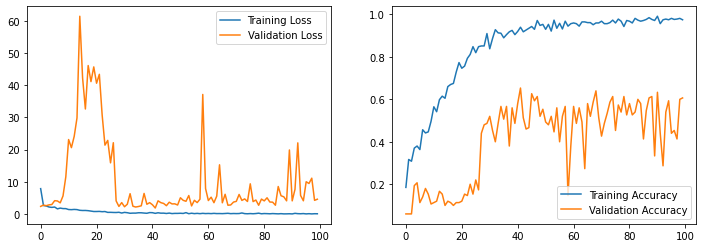

In [ ]:
losses = h.history['loss']
accs = h.history['accuracy']
val_losses = h.history['val_loss']
val_accs = h.history['val_accuracy']
epochs = len(losses)

plt.figure(figsize=(12, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/sample_data/model_music_genre_0.6533.h5')

In [ ]:
#prediction = model.predict_classes(X_test)

predict_x=model.predict(X_test) 
prediction=np.argmax(predict_x,axis=1)


5/5 [==============================] - 0s 6ms/step


In [ ]:
X_test.shape

(150, 64, 64, 3)

In [ ]:
prediction.shape

(150,)

In [ ]:
predictions = list(prediction)

In [ ]:
predictions

[6,
 4,
 1,
 2,
 3,
 9,
 4,
 2,
 2,
 4,
 5,
 4,
 8,
 4,
 3,
 7,
 0,
 7,
 4,
 7,
 6,
 6,
 5,
 4,
 0,
 2,
 3,
 8,
 5,
 2,
 4,
 6,
 6,
 3,
 4,
 1,
 2,
 5,
 5,
 5,
 1,
 4,
 0,
 5,
 4,
 7,
 7,
 6,
 5,
 5,
 0,
 6,
 4,
 4,
 6,
 1,
 7,
 5,
 6,
 6,
 7,
 2,
 3,
 9,
 3,
 2,
 3,
 0,
 5,
 7,
 5,
 5,
 3,
 8,
 3,
 5,
 6,
 2,
 2,
 4,
 3,
 0,
 4,
 7,
 0,
 5,
 3,
 6,
 8,
 0,
 7,
 0,
 8,
 0,
 1,
 3,
 6,
 3,
 1,
 5,
 1,
 3,
 8,
 8,
 2,
 0,
 0,
 3,
 5,
 2,
 7,
 6,
 2,
 7,
 5,
 0,
 0,
 6,
 9,
 5,
 5,
 5,
 8,
 0,
 8,
 8,
 0,
 7,
 3,
 8,
 3,
 3,
 3,
 4,
 6,
 4,
 5,
 7,
 0,
 4,
 5,
 2,
 7,
 5,
 5,
 6,
 1,
 5,
 0,
 0]

In [ ]:
index = tf.math.argmax(y_test, axis=1)
c = tf.keras.backend.eval(index)
c

array([6, 4, 1, 3, 3, 9, 4, 2, 7, 9, 1, 4, 3, 9, 2, 3, 0, 3, 4, 7, 6, 6,
       5, 4, 0, 9, 3, 4, 2, 2, 4, 6, 6, 4, 4, 1, 2, 5, 1, 5, 1, 9, 0, 1,
       9, 7, 7, 6, 5, 5, 0, 6, 4, 4, 6, 1, 7, 1, 6, 0, 3, 2, 9, 9, 3, 3,
       3, 0, 5, 8, 5, 5, 3, 8, 9, 5, 6, 0, 2, 4, 3, 0, 8, 7, 0, 4, 9, 6,
       8, 0, 7, 0, 8, 9, 1, 4, 6, 3, 1, 2, 1, 9, 0, 9, 2, 0, 8, 9, 5, 2,
       8, 6, 2, 7, 5, 8, 8, 4, 9, 1, 5, 1, 8, 4, 8, 2, 0, 7, 3, 8, 3, 0,
       2, 4, 6, 4, 2, 4, 0, 9, 5, 2, 8, 5, 1, 6, 1, 5, 9, 0])

In [ ]:
#Number of per-labels in y_test and predicitions
d=list(c)
for i in range(10):
  print('Count of',[i], 'in test data is:','     ',d.count(i))
  print('Count of',[i], 'in prediction data is:',predictions.count(i))

Count of [0] in test data is:       17
Count of [0] in prediction data is: 19
Count of [1] in test data is:       15
Count of [1] in prediction data is: 8
Count of [2] in test data is:       15
Count of [2] in prediction data is: 14
Count of [3] in test data is:       15
Count of [3] in prediction data is: 19
Count of [4] in test data is:       19
Count of [4] in prediction data is: 18
Count of [5] in test data is:       15
Count of [5] in prediction data is: 26
Count of [6] in test data is:       15
Count of [6] in prediction data is: 17
Count of [7] in test data is:       9
Count of [7] in prediction data is: 15
Count of [8] in test data is:       13
Count of [8] in prediction data is: 11
Count of [9] in test data is:       17
Count of [9] in prediction data is: 3


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(confusion_matrix(c, prediction))
print(classification_report(c, prediction))
print(accuracy_score(c, prediction))

[[13  0  1  1  0  0  1  0  1  0]
 [ 0  8  0  0  0  7  0  0  0  0]
 [ 0  0  9  2  0  3  0  0  1  0]
 [ 0  0  2  9  0  0  0  3  1  0]
 [ 1  0  0  2 12  1  1  1  1  0]
 [ 0  0  0  0  0 15  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  0  0]
 [ 0  0  1  0  0  0  0  8  0  0]
 [ 3  0  0  0  1  0  0  3  6  0]
 [ 2  0  1  5  5  0  0  0  1  3]]
              precision    recall  f1-score   support

           0       0.68      0.76      0.72        17
           1       1.00      0.53      0.70        15
           2       0.64      0.60      0.62        15
           3       0.47      0.60      0.53        15
           4       0.67      0.63      0.65        19
           5       0.58      1.00      0.73        15
           6       0.88      1.00      0.94        15
           7       0.53      0.89      0.67         9
           8       0.55      0.46      0.50        13
           9       1.00      0.18      0.30        17

    accuracy                           0.65       150
   macro avg       